In [2]:
pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, cauchy, laplace
from PIL import Image
import random
from tqdm.notebook import trange, tqdm

Параметры Гаусса: mu=84.773, sigma=20.244
Параметры Коши: x0=84.069, gamma=5.380
Параметры Лапласа: loc=84.000, scale=9.894


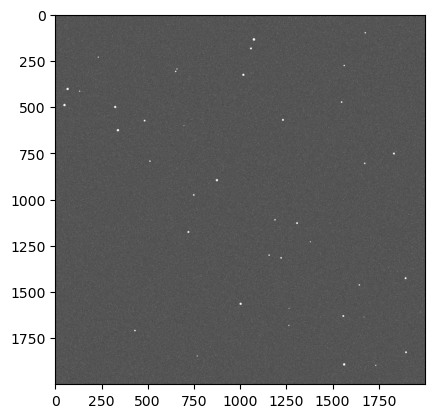

In [75]:
# 1) Чтение изображения в оттенках серого
img = cv2.imread("model_1.png")
plt.imshow(img, cmap="gray")
plt.figure(figsize=(10, 10))
plt.title("Старое Изображение")
plt.colorbar()

# Преобразуем в одномерный массив интенсивностей (0..255)
data = img.flatten().astype(np.float32)

# 2) Оценка параметров Гауссовского (Normal) шума
#    norm.fit вернёт (loc, scale) = (среднее, стандартное отклонение)
gauss_loc, gauss_scale = stats.norm.fit(data)
print(f"Параметры Гаусса: mu={gauss_loc:.3f}, sigma={gauss_scale:.3f}")

# 3) Оценка параметров шума Коши (Cauchy)
#    cauchy.fit вернёт (x0, gamma)
cauchy_x0, cauchy_gamma = stats.cauchy.fit(data)
print(f"Параметры Коши: x0={cauchy_x0:.3f}, gamma={cauchy_gamma:.3f}")

# 4) Оценка параметров Лапласовского шума (Laplace)
#    laplace.fit вернёт (loc, scale)
laplace_loc, laplace_scale = stats.laplace.fit(data)
print(f"Параметры Лапласа: loc={laplace_loc:.3f}, scale={laplace_scale:.3f}")











# # 5) (Необязательный шаг) Визуальное сравнение гистограммы с подогнанными распределениями
# plt.figure(figsize=(10,6))
# count, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.4, label='Гистограмма')

# # Создадим сетку значений для отрисовки PDF
# x_vals = np.linspace(data.min(), data.max(), 200)

# # PDF для Гаусса
# pdf_gauss = stats.norm.pdf(x_vals, loc=gauss_loc, scale=gauss_scale)
# plt.plot(x_vals, pdf_gauss, 'r-', label='Gaussian fit')

# # PDF для Коши
# pdf_cauchy = stats.cauchy.pdf(x_vals, cauchy_x0, cauchy_gamma)
# plt.plot(x_vals, pdf_cauchy, 'g--', label='Cauchy fit')

# # PDF для Лапласа
# pdf_laplace = stats.laplace.pdf(x_vals, laplace_loc, laplace_scale)
# plt.plot(x_vals, pdf_laplace, 'b:', label='Laplace fit')

# plt.title('Сравнение гистограммы с подогнанными распределениями')
# plt.xlabel('Яркость')
# plt.ylabel('Плотность вероятности')
# plt.legend()
# plt.show()

[[ 62  77  85 ...  86  87  99]
 [ 92  65  92 ...  76  84 101]
 [ 75  92 145 ...  86 109  81]
 ...
 [ 80 102  80 ...  70  73 126]
 [ 95  69  84 ...  85  89  88]
 [ 81  96  81 ...  85  76  96]]
шум
[[ 93.50864283  83.14751117  95.24834308 ...  68.78798859  86.90219681
   70.14162493]
 [ 81.96723102  85.69428293  81.93124412 ...  76.74283443  72.67724799
   81.02012905]
 [ 85.74203738  94.69643824  79.57640551 ...  70.256603    64.9410701
  100.66156148]
 ...
 [ 79.5652436   80.46385865  85.17508653 ...  82.32005194 105.40513539
   77.63910436]
 [ 92.83493174  87.17664153  99.87996091 ...  75.15315411  87.86991466
   90.32270218]
 [ 81.79567033  86.15447037  85.5694805  ...  85.71330038  87.45230967
   76.44266654]]

new_data
[[31.50864283  6.14751117 10.24834308 ... 17.21201141  0.09780319
  28.85837507]
 [10.03276898 20.69428293 10.06875588 ...  0.74283443 11.32275201
  19.97987095]
 [10.74203738  2.69643824 65.42359449 ... 15.743397   44.0589299
  19.66156148]
 ...
 [ 0.4347564  21.536

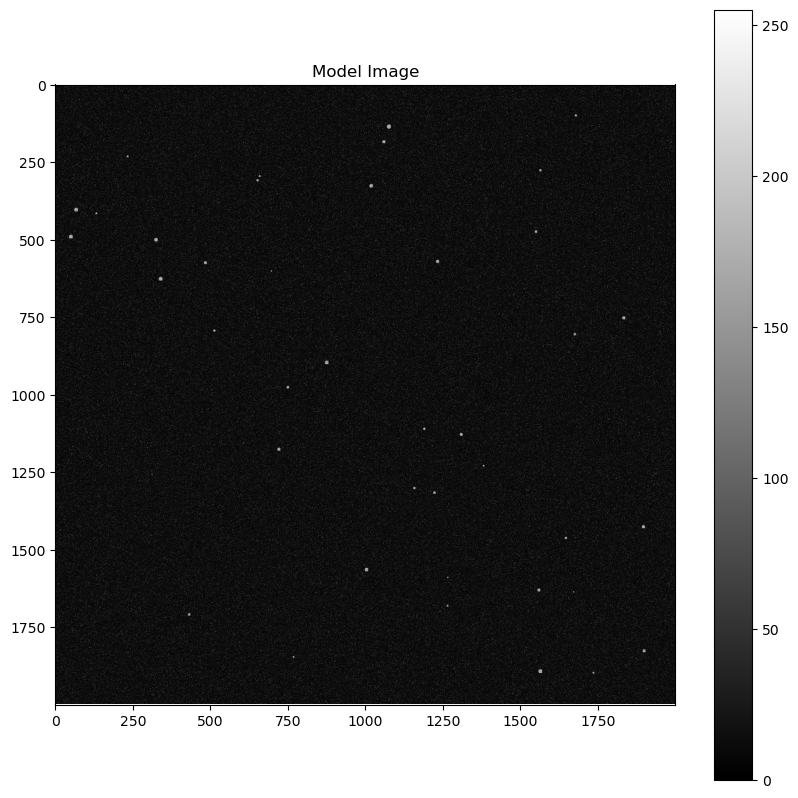

In [67]:
# 5) Вычитание из данных нового сгенеррированного шума


# Размер изображения с телескопа
width, height = 2000, 2000


Gaus_noise = norm.rvs(loc=gauss_loc, scale=gauss_scale, size=(height, width))
Kosh_noise = cauchy.rvs(loc=cauchy_x0, scale=cauchy_gamma, size=(height, width))
Lapl_noise = laplace.rvs(loc=laplace_loc, scale=laplace_scale, size=(height, width))

# Суперпозиция шумов
noise = (Gaus_noise + Kosh_noise + Lapl_noise)/3
noise = np.clip(noise, 0, 512) # шум в заданном диапазоне

print(img[:,:,0])
# print(Gaus_noise)
# print(Kosh_noise)
# print(Lapl_noise)
print("шум")
print(noise)
print()

#noise_uint8 = (noise / 512 * 255).astype(np.uint8)

# Конечные данные
new_data = np.abs(img[:,:,0] - noise)

print("new_data")
print(new_data)

new_data = np.clip(new_data, 0, 512) # шум в заданном диапазоне




new_data_uint8 = (new_data / 512 * 255).astype(np.uint8)
plt.imsave("new_data.png", new_data_uint8, cmap="gray")
np.savetxt("new_data.txt", new_data.astype(int), fmt="%d")



# Визуализация и сохранение
new_data = (new_data).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(new_data, cmap="gray")
plt.title("Новое Изображение")
plt.colorbar()

In [76]:
# Убирание шума из условия количества светлых соседей

max_pixel_not_noise = 30
min_count = 3
for i in trange(1,2000-1):
    for j in range(1,2000-1):
        
        count_norm_pixels = 0
        if(new_data[i-1][j-1] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i][j-1] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i+1][j-1] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i+1][j] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i+1][j+1] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i][j+1] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i-1][j+1] > max_pixel_not_noise):
            count_norm_pixels += 1
        if(new_data[i][j+1] > max_pixel_not_noise):
            count_norm_pixels += 1
        
        if(count_norm_pixels < min_count):
            new_data[i][j] = 0


  0%|          | 0/1998 [00:00<?, ?it/s]

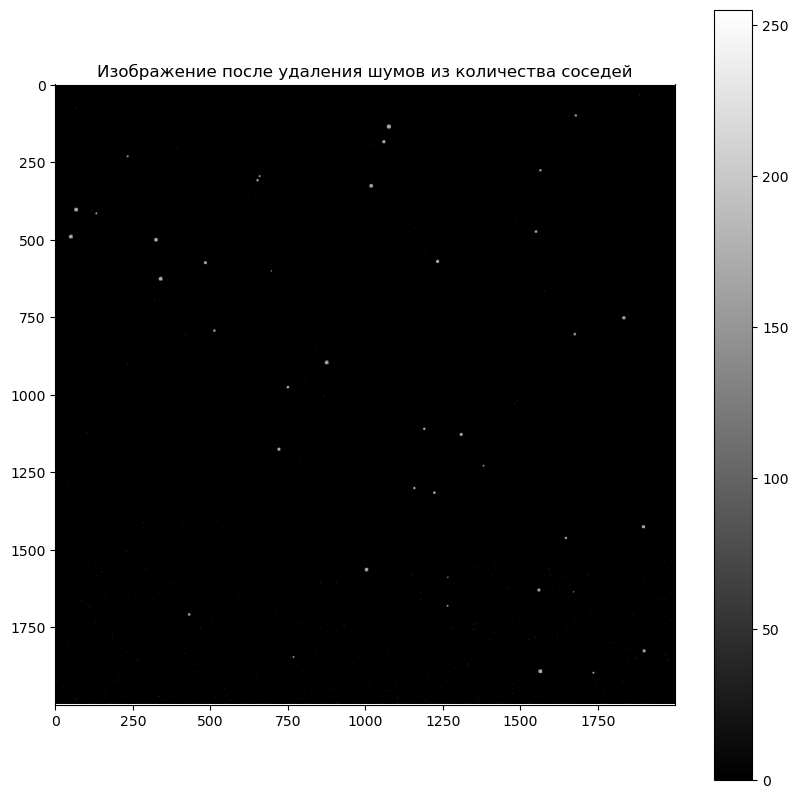

In [81]:
new_data_uint8 = (new_data).astype(np.uint8)
plt.imsave("new_data_2.png", new_data_uint8, cmap="gray")
np.savetxt("new_data_2.txt", new_data.astype(int), fmt="%d")

new_data = (new_data).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(new_data, cmap="gray")
plt.title("Изображение после удаления шумов из количества соседей")
plt.colorbar()



In [79]:
max(new_data)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()